Payoff Hawk vs Hawk: -25.0
Payoff Hawk vs Dove: 50
Payoff Dove vs Dove: 15.0
Payoff Dove vs Hawk: 0
--------------------------------------------------
Population stabilizes at hawk share: 58.32% with average payoff of: 6.25

Max payoff: 50.0 at hawk share: 0.0%
Min payoff: -25.0 at hawk share: 100.0%
Max total payoff: 16.7 at hawk share: 16.7%
Min total payoff: -25.0 at hawk share: 100.0%


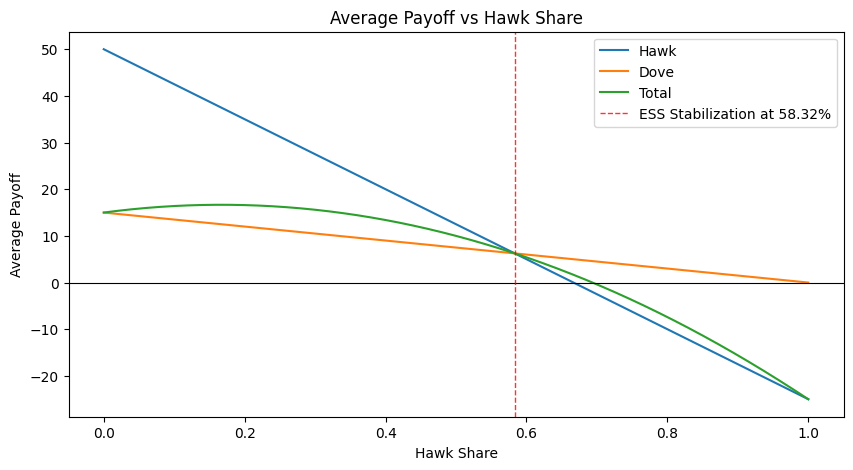

In [129]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Define the parameters
hawk_share = 0.1
dove_share = 1 - hawk_share

hawk_payoff = 50
dove_payoff = 50
hawk_cost = -100
dove_cost = -10


# # Initialize the population
# population = np.random.choice([0, 1], size=1000, p=[dove_share, hawk_share])

# hawk_count = np.count_nonzero(population == 1)
# dove_count = np.count_nonzero(population == 0)

# print(f"Hawk count: {hawk_count}, Dove count: {dove_count}")


# Calculate the payoff for each strategy
hawk_hawk_winrate = 0.5
dove_hawk_winrate = 0
hawk_dove_winrate = 1
dove_dove_winrate = 0.5

avg_hawk_hawk_payoff = hawk_payoff * hawk_hawk_winrate + hawk_cost * hawk_hawk_winrate
avg_hawk_dove_payoff = hawk_payoff * hawk_dove_winrate + hawk_cost * (1 - hawk_dove_winrate)

avg_dove_dove_payoff = dove_payoff * dove_dove_winrate + dove_cost 
avg_dove_hawk_payoff = dove_payoff * dove_hawk_winrate


print(f"Payoff Hawk vs Hawk: {avg_hawk_hawk_payoff}")
print(f"Payoff Hawk vs Dove: {avg_hawk_dove_payoff}")

print(f"Payoff Dove vs Dove: {avg_dove_dove_payoff}")
print(f"Payoff Dove vs Hawk: {avg_dove_hawk_payoff}")
print(50 * "-")


# Calculate the average payoff for each strategy as a function of the hawk share
hawk_shares = np.linspace(0, 1, 10000)

avg_hawk_payoff = []
avg_dove_payoff = []
total_payoff = []

for x in hawk_shares:
    avg_hawk_payoff.append(avg_hawk_hawk_payoff * x + avg_hawk_dove_payoff * (1 - x))
    avg_dove_payoff.append(avg_dove_dove_payoff * (1 - x) + avg_dove_hawk_payoff * x)
    total_payoff.append(avg_hawk_payoff[-1] * x + avg_dove_payoff[-1] * (1 - x))

# print(avg_dove_payoff[-1])
# print(np.array(avg_dove_payoff))


payoff_diff = np.array(avg_hawk_payoff) - np.array(avg_dove_payoff)

idx = np.where(np.diff(np.sign(payoff_diff)))[0]

if len(idx) > 0:
    intersection_idx = idx[0]
    intersection_value = (np.array(avg_hawk_payoff)[intersection_idx] + np.array(avg_dove_payoff)[intersection_idx]) / 2
    intersection_hawk_share = (intersection_idx / len(hawk_shares)) * 100
    print(f"Population stabilizes at hawk share: {intersection_hawk_share:.2f}% with average payoff of: {intersection_value:.2f}\n")


max_payoff = max(max(avg_hawk_payoff), max(avg_dove_payoff))
print(f"Max payoff: {max_payoff:.1f} at hawk share: {hawk_shares[np.argmax(avg_hawk_payoff)]*100:.1f}%")

min_payoff = min(min(avg_hawk_payoff), min(avg_dove_payoff))
print(f"Min payoff: {min_payoff:.1f} at hawk share: {hawk_shares[np.argmin(avg_hawk_payoff)]*100:.1f}%")

max_total_payoff = max(total_payoff)
print(f"Max total payoff: {max_total_payoff:.1f} at hawk share: {hawk_shares[np.argmax(total_payoff)]*100:.1f}%")

min_total_payoff = min(total_payoff)
print(f"Min total payoff: {min_total_payoff:.1f} at hawk share: {hawk_shares[np.argmin(total_payoff)]*100:.1f}%")


# Plot the average payoff for each strategy as a function of the hawk share
fig, ax = plt.subplots(figsize=(10, 5))

sns.lineplot(x=hawk_shares, y=avg_hawk_payoff, ax=ax, label="Hawk")
sns.lineplot(x=hawk_shares, y=avg_dove_payoff, ax=ax, label="Dove")
sns.lineplot(x=hawk_shares, y=total_payoff, ax=ax, label="Total")

ax.set_xlabel("Hawk Share")
ax.set_ylabel("Average Payoff")
ax.set_title("Average Payoff vs Hawk Share")
ax.axhline(y=0, color='black', linewidth=0.8)
ax.axvline(x=intersection_hawk_share / 100, color="red", linestyle="--", alpha=0.8, linewidth=1, label=f"ESS Stabilization at {intersection_hawk_share:.2f}%")
ax.legend()


plt.show()